Using Python Version 3.7.2

In [1150]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1151]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1152]:
# Importing dataset

housingDataInfo = pd.read_csv('train.csv', encoding = 'latin')
housingDataInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1153]:
# inspect housingDataInfo dataframe

#Getting info
print(housingDataInfo.info())
#Getting shape
print(housingDataInfo.shape)
#Getting if any null values are their
print(housingDataInfo.isnull().any())
#Describing the dataframe
housingDataInfo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1154]:
# check for null values in all categorical columns

checkNullValues=housingDataInfo.select_dtypes(include='object').isnull().sum()
print(checkNullValues[checkNullValues>0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1155]:
# Checking and Replacing Nan values with None : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housingDataInfo[col]=housingDataInfo[col].fillna('None')

In [1156]:
#Dropping the columns with specific values

def getHighCategoricalValue():
    column = []
    categorical_columns = housingDataInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingDataInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValue()


housingDataInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingDataInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [1157]:
# once again check for null values in all categorical columns

checkNullValues=housingDataInfo.select_dtypes(include='object').isnull().sum()
print(checkNullValues[checkNullValues>0])

Series([], dtype: int64)


In [1158]:
# check the null values in the numerical data

checkNullValues1=housingDataInfo.select_dtypes(include=['int64','float']).isnull().sum()
print(checkNullValues1[checkNullValues1>0])                                                                 

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [1159]:
#Replace the null values with median values for the following variables

housingDataInfo['LotFrontage'] = housingDataInfo['LotFrontage'].replace(np.nan, housingDataInfo['LotFrontage'].median())
housingDataInfo['MasVnrArea'] = housingDataInfo['MasVnrArea'].replace(np.nan, housingDataInfo['MasVnrArea'].median())

In [1160]:
# Setting the null values with 0 and changing the type of the column to int

housingDataInfo['GarageYrBlt']=housingDataInfo['GarageYrBlt'].fillna(0)
housingDataInfo['GarageYrBlt'] =housingDataInfo['GarageYrBlt'].astype(int)

In [1161]:
#The following will help to check if the house is remodelled or not by taking the difference between years
def checkForRemodel(row1):
    if(row1['YearBuilt'] == row1['YearRemodAdd']):
        return 0
    elif(row1['YearBuilt'] < row1['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingDataInfo['IsRemodelled'] = housingDataInfo.apply(checkForRemodel, axis=1)
housingDataInfo.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [1162]:
# The following code is to determine the age of the building while selling

def getBuiltOrRemodelAge(row1):
    if(row1['YearBuilt'] == row1['YearRemodAdd']):
        return row1['YrSold'] - row1['YearBuilt']
    else:
        return row1['YrSold'] - row1['YearRemodAdd']
       
housingDataInfo['BuiltOrRemodelAge'] = housingDataInfo.apply(getBuiltOrRemodelAge, axis=1)
housingDataInfo.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [1163]:
#The Following Code is used the age of the garage
#The garage less than 2000 is considered as 0 and greater  than 2000 is 1
def getGarageConstructionPeriod(row1):
    if row1 == 0:
        return 0
    elif row1 >= 1900 and row1 < 2000:        
        return 0
    else:   
        return 1
    
housingDataInfo['OldOrNewGarage'] = housingDataInfo['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingDataInfo.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [1164]:
#Since new Columns are created from this we can drop this

housingDataInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [1165]:
#Dropping MoSold since it has the specific value
def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingDataInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingDataInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingDataInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)
housingDataInfo.drop(['MoSold'], axis = 1, inplace = True)

housingDataInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [1166]:
# checking  for the  percentage of null values in each column

percent_missing = round(100*(housingDataInfo.isnull().sum()/len(housingDataInfo.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [1167]:
# Check for the if there are any duplicate values in the dataset

housingDataInfo[housingDataInfo.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


In [1168]:
# Checking  for the outliers for all percentiles

housingDataInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


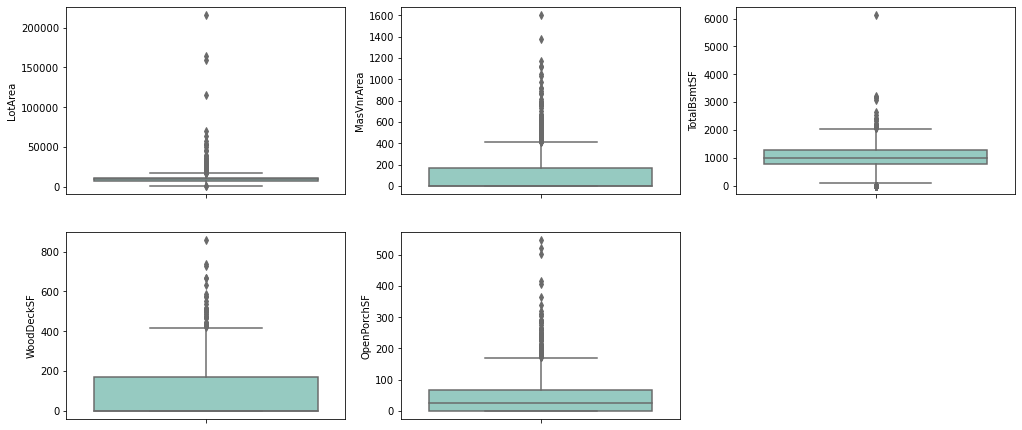

In [1169]:
# Checking for  the outliers in all the columns that are numerical

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housingDataInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housingDataInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housingDataInfo)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data =housingDataInfo)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingDataInfo)
plt.show()

In [1170]:

# Removing values beyond 98% as they are considered to be the outliers

nn_quartile_LotArea = housingDataInfo['LotArea'].quantile(0.98)
housingDataInfo =housingDataInfo[housingDataInfo["LotArea"] < nn_quartile_LotArea]



nn_quartile_MasVnrArea = housingDataInfo['MasVnrArea'].quantile(0.98)
housingDataInfo = housingDataInfo[housingDataInfo["MasVnrArea"] < nn_quartile_MasVnrArea]



nn_quartile_TotalBsmtSF =housingDataInfo['TotalBsmtSF'].quantile(0.99)
housingDataInfo= housingDataInfo[housingDataInfo["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]


nn_quartile_WoodDeckSF = housingDataInfo['WoodDeckSF'].quantile(0.99)
housingDataInfo= housingDataInfo[housingDataInfo["WoodDeckSF"] < nn_quartile_WoodDeckSF]



nn_quartile_OpenPorchSF = housingDataInfo['OpenPorchSF'].quantile(0.99)
housingDataInfo =housingDataInfo[housingDataInfo["OpenPorchSF"] < nn_quartile_OpenPorchSF]

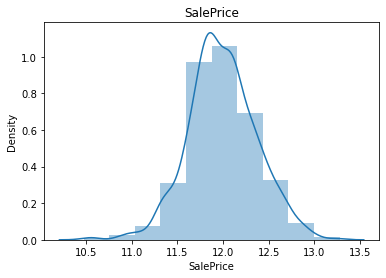

In [1171]:
# Visualise the target variable -> SalePrice after transforming the sales price

housingDataInfo['SalePrice'] = np.log1p(housingDataInfo['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingDataInfo['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

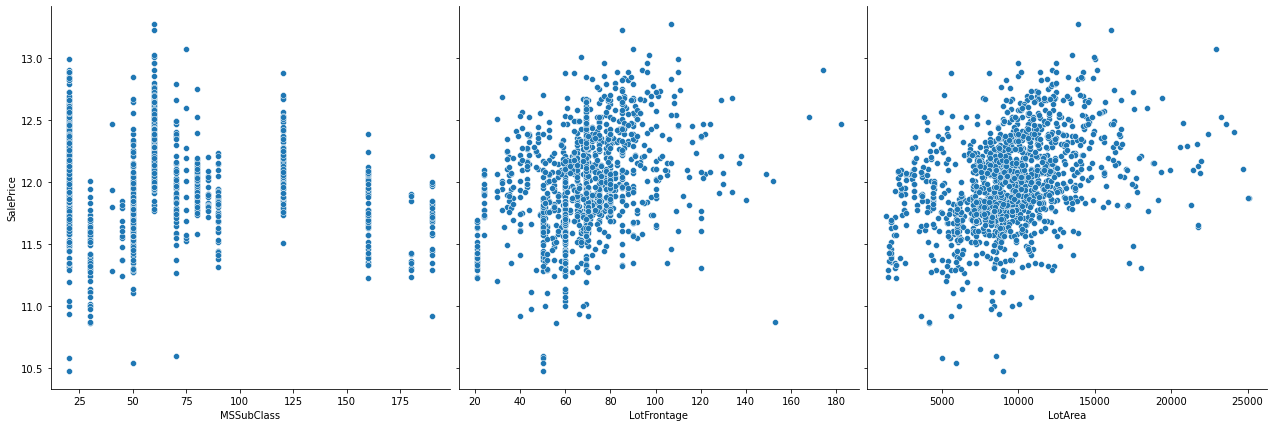

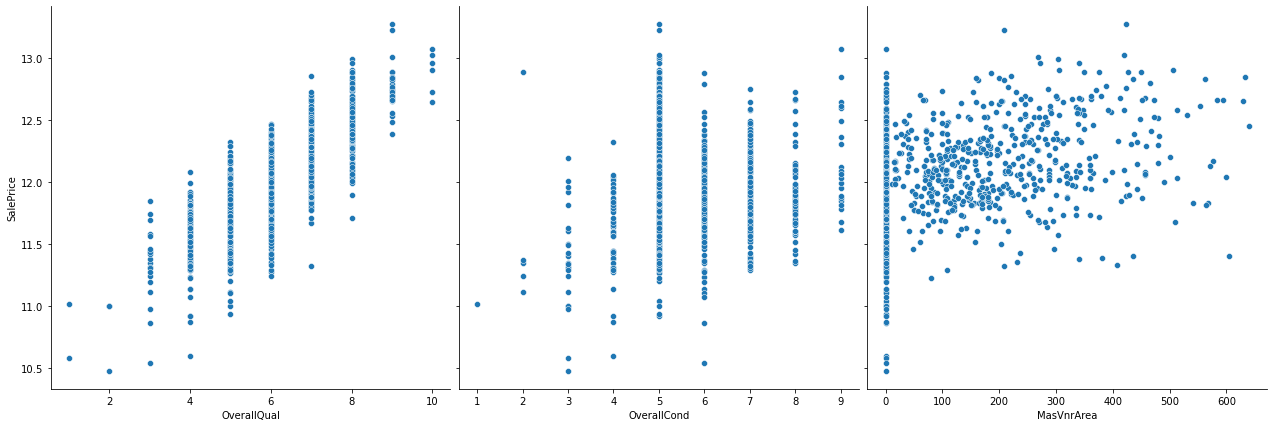

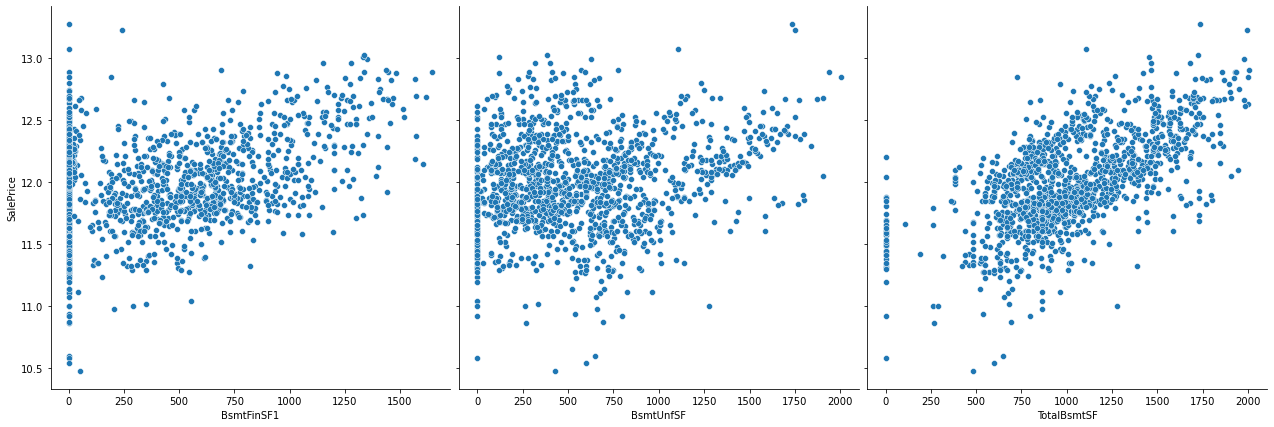

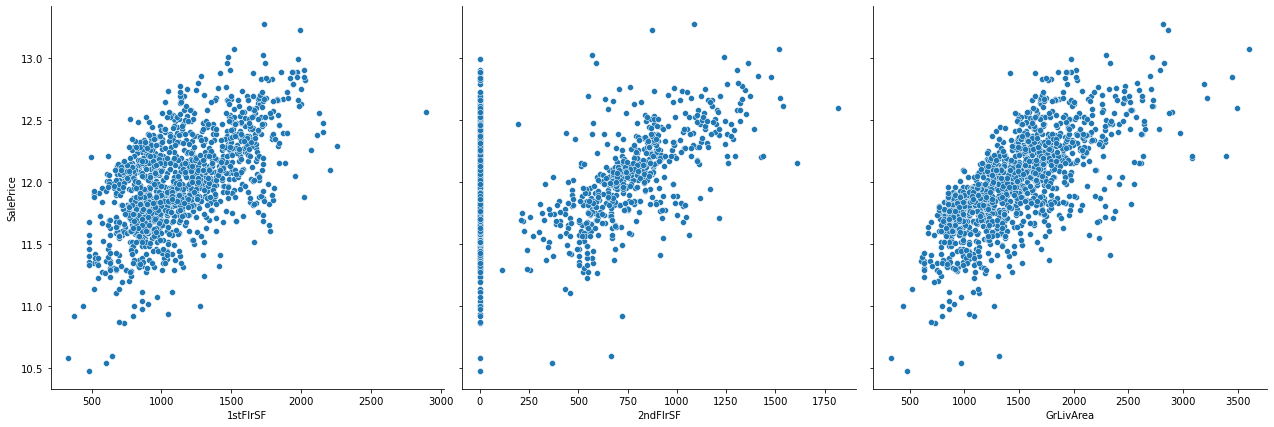

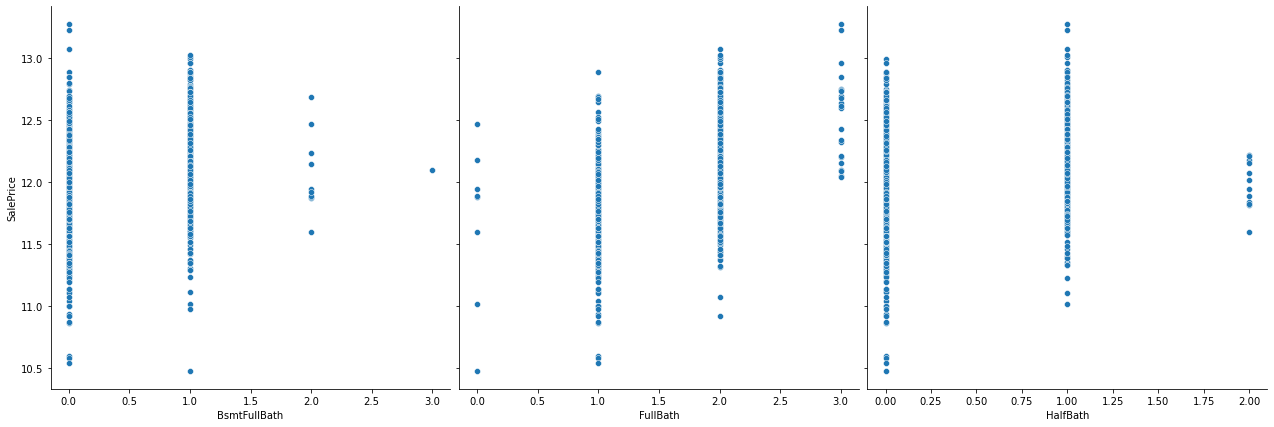

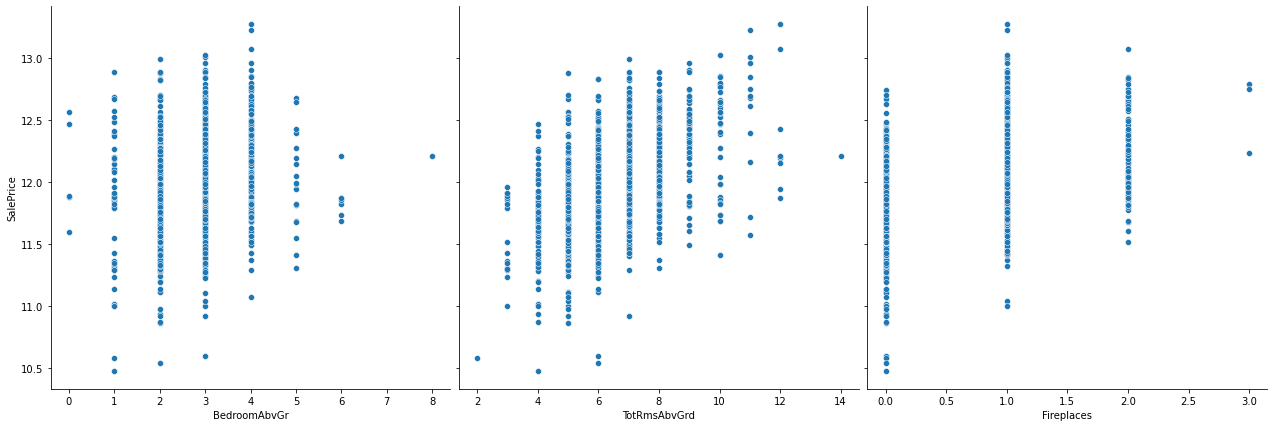

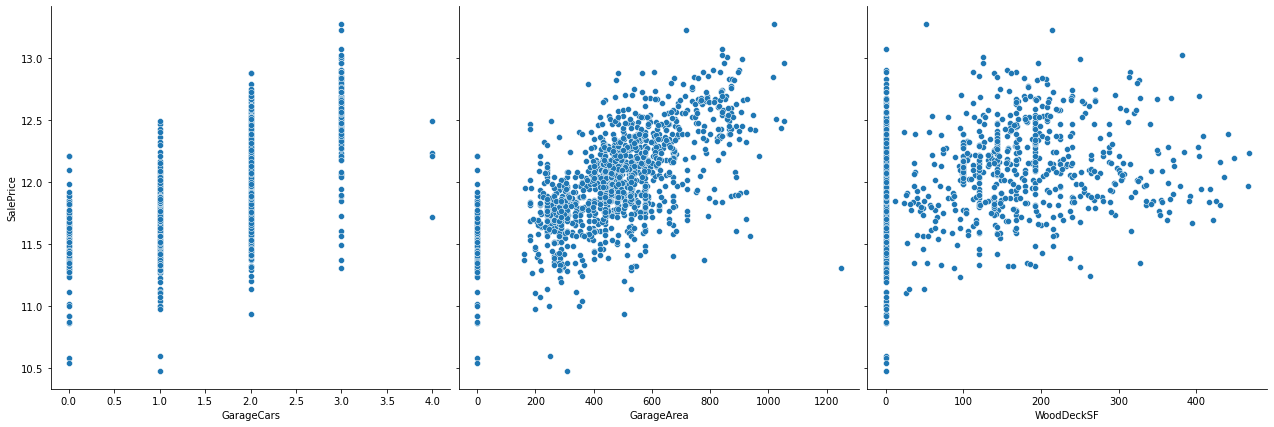

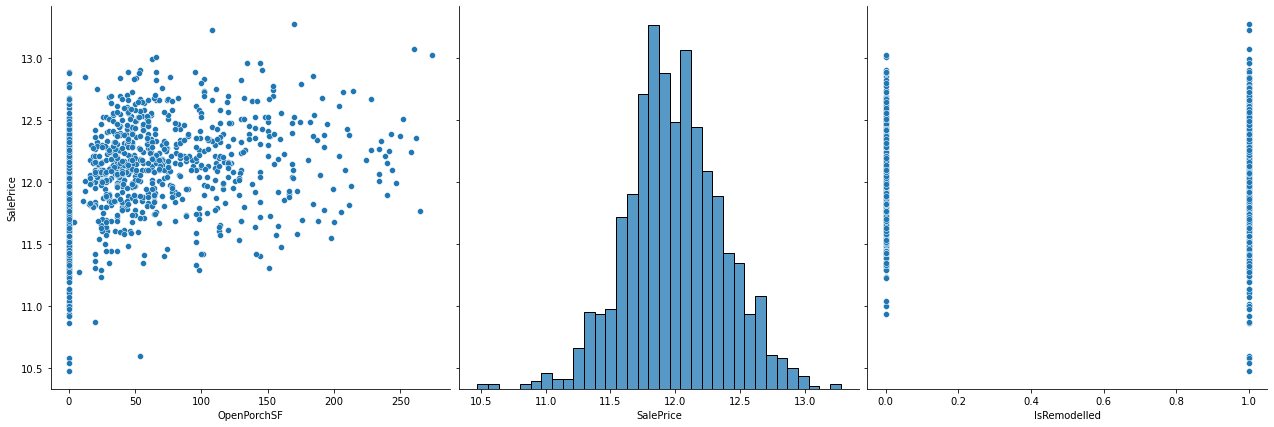

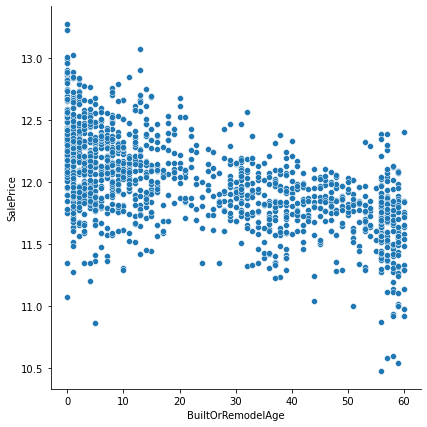

In [1172]:
# Plotting the pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housingDataInfo, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
sns.pairplot(housingDataInfo, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=6, aspect=1,kind='scatter')
plt.show()

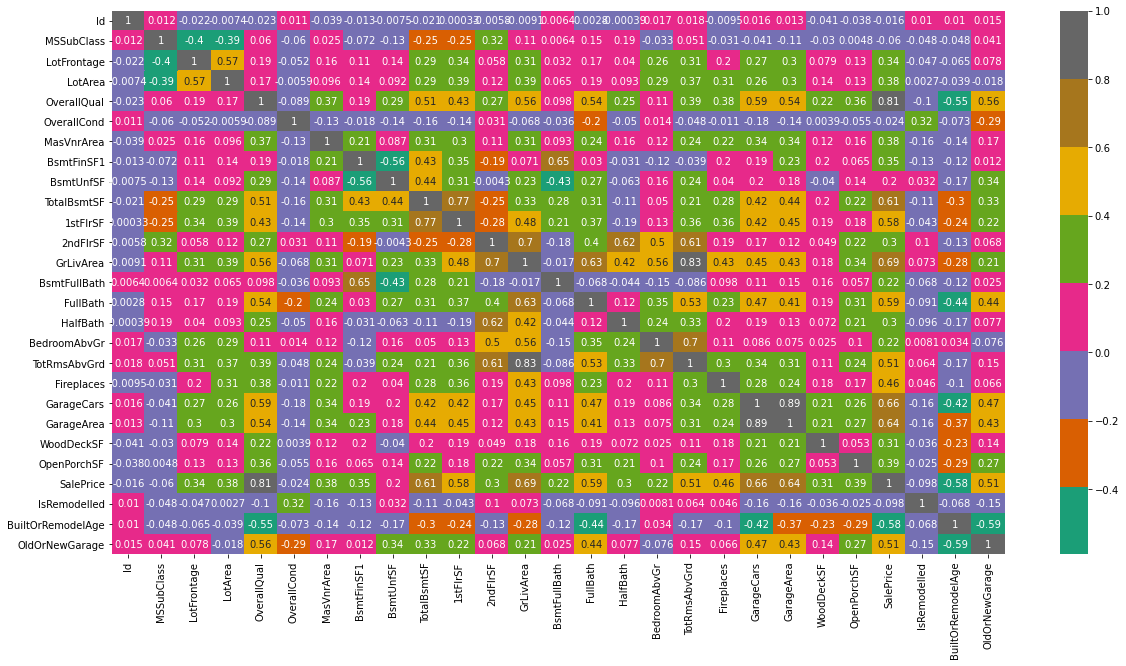

In [1173]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housingDataInfo.corr(), annot = True, cmap="Dark2")
plt.show()


In [1174]:
# Dropping highly correlated variables

housingDataInfo.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [1175]:
# Checking the shape of the dataframe

housingDataInfo.shape

(1358, 47)

In [1176]:
#Assigning the values to the variables which are categorical in sequential manner

housingDataInfo['d_LotShape'] = housingDataInfo['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housingDataInfo['d_ExterQual'] =housingDataInfo['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housingDataInfo['d_BsmtQual'] = housingDataInfo['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingDataInfo['d_BsmtExposure'] = housingDataInfo['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housingDataInfo['d_BsmtFinType1'] = housingDataInfo['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housingDataInfo['d_HeatingQC'] = housingDataInfo['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingDataInfo['d_KitchenQual'] = housingDataInfo['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingDataInfo['d_FireplaceQu'] =housingDataInfo['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingDataInfo['d_GarageFinish'] =housingDataInfo['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housingDataInfo['d_BldgType'] = housingDataInfo['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housingDataInfo['d_HouseStyle'] = housingDataInfo['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housingDataInfo['d_Fence'] = housingDataInfo['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housingDataInfo['d_LotConfig'] = housingDataInfo['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housingDataInfo['d_MasVnrType'] = housingDataInfo['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housingDataInfo['d_SaleCondition'] =housingDataInfo['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housingDataInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [1177]:
# dropping  the old columns from which the new columns were derived


housingDataInfo =housingDataInfo.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)
housingDataInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [1178]:

# Creating dummies 

d_MSZoning1 = pd.get_dummies(housingDataInfo['MSZoning'], prefix='MSZoning', drop_first = True)
housingDataInfo= pd.concat([housingDataInfo, d_MSZoning1], axis = 1)



d_Neighborhood1 = pd.get_dummies(housingDataInfo['Neighborhood'], prefix='Neighborhood', drop_first = True)
housingDataInfo = pd.concat([housingDataInfo, d_Neighborhood1], axis = 1)



d_RoofStyle1 = pd.get_dummies(housingDataInfo['RoofStyle'], prefix='RoofStyle', drop_first = True)
housingDataInfo = pd.concat([housingDataInfo, d_RoofStyle1], axis = 1)


d_Exterior1st1 = pd.get_dummies(housingDataInfo['Exterior1st'], prefix='Exterior1st', drop_first = True)
housingDataInfo = pd.concat([housingDataInfo, d_Exterior1st1], axis = 1)



d_Exterior2nd1= pd.get_dummies(housingDataInfo['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housingDataInfo= pd.concat([housingDataInfo, d_Exterior2nd1], axis = 1)


d_Foundation1 = pd.get_dummies(housingDataInfo['Foundation'], prefix='Foundation', drop_first = True)
housingDataInfo = pd.concat([housingDataInfo, d_Foundation1], axis = 1)



d_GarageType1 = pd.get_dummies(housingDataInfo['GarageType'], prefix='GarageType', drop_first = True)
housingDataInfo= pd.concat([housingDataInfo, d_GarageType1], axis = 1)

housingDataInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [1179]:
# drop the below columns as we now have new columns derived from these columns

housingDataInfo = housingDataInfo.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housingDataInfo.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [1180]:
housingDataInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


In [1181]:
# Putting all feature variable to X

X = housingDataInfo.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [1182]:
# Putting response variable to y
y = housingDataInfo['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

RIDGE ANALYSES

In [1183]:
# features Scaling

from sklearn.preprocessing import scale
#storing columns into a dataframe
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [1184]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [1185]:
# list of all pf alphas that is being used

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

#and doing cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1186]:
# displaying mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,50,-0.071819,-0.080884,1
24,100,-0.072677,-0.080894,2
16,5.0,-0.070443,-0.080919,3
17,6.0,-0.070513,-0.080920,4
21,10.0,-0.070753,-0.080922,5
20,9.0,-0.070698,-0.080924,6
18,7.0,-0.070577,-0.080924,7
19,8.0,-0.070639,-0.080925,8
15,4.0,-0.070370,-0.080932,9
22,20,-0.071156,-0.080937,10


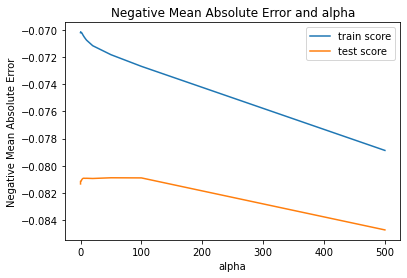

In [1187]:
# plotting mean test and train scores with all alphas 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')



plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1188]:
# getting the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=50)

In [1189]:
# check the coefficient values with lambda = 50

alpha =50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.66069986e-03,  9.24606403e-03,  1.76917451e-02,  6.41964141e-02,
        3.56436748e-02,  2.19564467e-03,  1.99246157e-02, -2.56340576e-03,
        4.19596027e-02,  3.14633466e-02,  2.85888383e-02,  5.50158196e-02,
        1.01640963e-02,  9.97785354e-03,  1.30653477e-02,  6.92123257e-03,
        7.89728676e-03,  2.89058670e-02,  1.03662128e-02,  9.58099971e-03,
       -1.56378361e-02, -2.65390330e-02,  1.33187037e-02,  7.68732190e-04,
        4.36803551e-03,  1.10355167e-02,  1.06569498e-02,  1.01723016e-02,
        1.55704190e-02,  1.68417341e-02,  9.17855651e-03,  1.22362177e-02,
       -1.45794529e-02,  1.08264221e-02, -1.39563359e-03, -3.95937877e-03,
        2.38949664e-03,  1.77296533e-02,  1.71685006e-02,  3.47816148e-03,
        2.37793997e-02,  1.37171189e-02, -2.85128470e-04, -5.43531292e-03,
        1.74347410e-03, -4.75895298e-04,  1.87260841e-03,  1.86518407e-02,
       -1.28088652e-02, -4.54625964e-03, -1.56667583e-02, -1.83329888e-02,
       -6.66611061e-03, -

In [1190]:
# Checking the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.016786281689339246

In [1191]:
# Putting the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0057
1,LotFrontage,0.0092
2,LotArea,0.0177
3,OverallQual,0.0642
4,OverallCond,0.0356
5,MasVnrArea,0.0022
6,BsmtFinSF1,0.0199
7,BsmtUnfSF,-0.0026
8,TotalBsmtSF,0.0420
9,1stFlrSF,0.0315


In [1192]:
ridge1=ridge_df['Coefficient']

In [1193]:
# Assigning the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
len(ridge_coeff_dict)

111

In [1194]:
# Do an RFE for minimising the features to 100
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train_ridge, y_train)

In [1195]:
# Method for coefficient values

def finding(x):
    return ridge_coeff_dict[x]

# Assign top 20 features to a temp dataframe for further display in the bar plot

temp1_dfs = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_dfs = temp1_dfs.loc[temp1_dfs['rfe_support'] == True]
temp1_dfs.reset_index(drop=True, inplace=True)

temp1_dfs['Coefficient'] = temp1_dfs['Features'].apply(finding)
temp1_dfs = temp1_dfs.sort_values(by=['Coefficient'], ascending=False)
temp1_dfs = temp1_dfs.head(20)
temp1_dfs

,Features,rfe_support,rfe_ranking,Coefficient
3,OverallQual,True,1,0.064196
11,GrLivArea,True,1,0.055016
8,TotalBsmtSF,True,1,0.041960
4,OverallCond,True,1,0.035644
9,1stFlrSF,True,1,0.031463
17,GarageCars,True,1,0.028906
90,Foundation_PConc,True,1,0.028786
10,2ndFlrSF,True,1,0.028589
38,MSZoning_RL,True,1,0.023779
54,Neighborhood_NridgHt,True,1,0.023572


In [1196]:
#calculating mse,rmse,r2_score for both train and test dataset

from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9251531792580018
0.8862102428896714
9.746972983918312
6.848802929250413
0.010259971562019276
0.016786281689339246


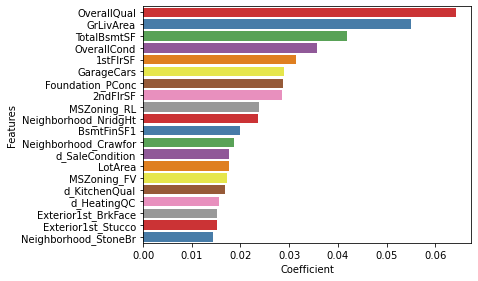

In [1197]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_dfs)
plt.show()

LASSO REGRESSION

In [1198]:
#Performing Lasso
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# performing cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1199]:
# displaying the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.070619,-0.080602,1
3,0.0004,-0.070877,-0.080634,2
1,0.0002,-0.070415,-0.080696,3
4,0.0005,-0.071132,-0.080749,4
6,0.002,-0.073270,-0.080768,5
7,0.003,-0.074176,-0.080824,6
5,0.001,-0.072157,-0.080929,7
0,0.0001,-0.070245,-0.080949,8
8,0.004,-0.075019,-0.081091,9
9,0.005,-0.075855,-0.081668,10


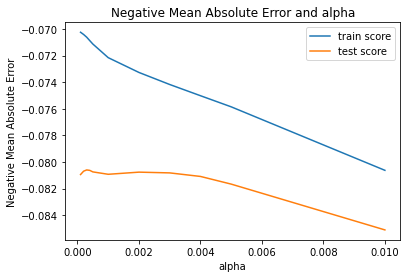

In [1200]:
# plotting mean test and train scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1201]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [1202]:
# check the coefficient values with lambda = 0.0001

alpha =0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)
print(lasso.intercept_)

[-2.72355186e-03  8.74703146e-03  1.80988498e-02  6.98834093e-02
  3.72643230e-02  6.25231407e-04  1.39792480e-02 -9.57591253e-03
  5.44196981e-02  1.07482059e-03 -0.00000000e+00  9.92458506e-02
  1.00586774e-02  4.27347920e-03  9.87803282e-03  1.74679204e-03
  6.45545565e-03  3.20126773e-02  1.04756509e-02  8.80432879e-03
 -1.67356789e-02 -2.70125169e-02  1.41558140e-02  6.40813307e-04
 -0.00000000e+00  8.77748738e-03  1.02208243e-02  9.28062711e-03
  1.53009478e-02  1.51170984e-02  7.16721405e-03  1.25837279e-02
 -1.86969450e-02  8.20685858e-03 -2.83618083e-03 -4.39957494e-03
  3.08501773e-03  1.58360818e-02  5.53198157e-02  2.13767001e-02
  9.60199350e-02  7.57993802e-02 -2.37168706e-04 -5.47704563e-03
  4.89346883e-04 -2.57101186e-03  0.00000000e+00  1.73904505e-02
 -1.53693915e-02 -5.28401128e-03 -1.15318778e-02 -1.76645300e-02
 -7.97023054e-03 -8.62699244e-03  1.98102076e-03 -3.21210441e-03
  6.43353181e-03  2.34981185e-02 -2.73095213e-02  0.00000000e+00
 -9.03698332e-03 -2.16015

In [1203]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01623647283644146

In [1204]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df

,Features,Coefficient
0,MSSubClass,-0.0027
1,LotFrontage,0.0087
2,LotArea,0.0181
3,OverallQual,0.0699
4,OverallCond,0.0373
5,MasVnrArea,0.0006
6,BsmtFinSF1,0.0140
7,BsmtUnfSF,-0.0096
8,TotalBsmtSF,0.0544
9,1stFlrSF,0.0011


In [1205]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.002723551864985681,
 'LotFrontage': 0.008747031461417686,
 'LotArea': 0.01809884980817371,
 'OverallQual': 0.06988340933590893,
 'OverallCond': 0.037264323033866655,
 'MasVnrArea': 0.0006252314073137408,
 'BsmtFinSF1': 0.013979248026005914,
 'BsmtUnfSF': -0.009575912529434995,
 'TotalBsmtSF': 0.05441969806498586,
 '1stFlrSF': 0.0010748205896370711,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.09924585055070884,
 'BsmtFullBath': 0.010058677364557537,
 'FullBath': 0.004273479203406504,
 'HalfBath': 0.009878032824798077,
 'BedroomAbvGr': 0.0017467920448876457,
 'Fireplaces': 0.00645545564807589,
 'GarageCars': 0.032012677263339985,
 'WoodDeckSF': 0.010475650947195695,
 'OpenPorchSF': 0.008804328791219887,
 'IsRemodelled': -0.01673567887293338,
 'BuiltOrRemodelAge': -0.027012516946456365,
 'OldOrNewGarage': 0.014155813988130612,
 'd_LotShape': 0.0006408133066670798,
 'd_ExterQual': -0.0,
 'd_BsmtQual': 0.008777487376403513,
 'd_BsmtExposure': 0.010220824309920681,
 'd_BsmtFinType1'

In [1206]:
# Do an RFE to minimise the features to 20

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1207]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_dfs = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_dfs = temp2_dfs.loc[temp2_dfs['rfe_support'] == True]
temp2_dfs.reset_index(drop=True, inplace=True)

temp2_dfs['Coefficient'] = temp2_dfs['Features'].apply(find)
temp2_dfs = temp2_dfs.sort_values(by=['Coefficient'], ascending=False)
temp2_dfs = temp2_dfs.head(20)
temp2_dfs

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.099246
13,MSZoning_RL,True,1,0.096020
14,MSZoning_RM,True,1,0.075799
1,OverallQual,True,1,0.069883
11,MSZoning_FV,True,1,0.055320
4,TotalBsmtSF,True,1,0.054420
19,Foundation_PConc,True,1,0.038136
2,OverallCond,True,1,0.037264
6,GarageCars,True,1,0.032013
16,Neighborhood_NridgHt,True,1,0.023498


In [1208]:
lasso1=temp2_dfs['Coefficient']

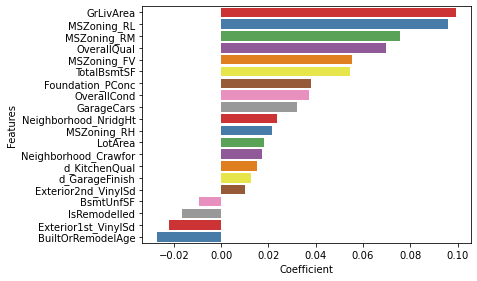

In [1209]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_dfs)
plt.show()

In [1210]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9276259077046135
0.8899372514664475
9.424960410414748
6.624480917268116
0.009921010958331313
0.01623647283644146


Regular Linear Regression

In [1211]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [1212]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_trainL[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_trainL)

# running RFE
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train_ridge, y_trainL)

In [1213]:
# Method for getting coefficient values

def finding(x):
    return ridge_coeff_dict[x]

# Assign top 15 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(finding)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(15)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
3,OverallQual,True,1,0.064196
11,GrLivArea,True,1,0.055016
8,TotalBsmtSF,True,1,0.041960
4,OverallCond,True,1,0.035644
9,1stFlrSF,True,1,0.031463
17,GarageCars,True,1,0.028906
90,Foundation_PConc,True,1,0.028786
10,2ndFlrSF,True,1,0.028589
38,MSZoning_RL,True,1,0.023779
54,Neighborhood_NridgHt,True,1,0.023572


In [1214]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_trainL,y_trainL)

LinearRegression()

In [1215]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_trainL,y_trainL)

In [1216]:
list(zip(X_trainL.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 59),
 ('LotFrontage', False, 34),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 79),
 ('BsmtFinSF1', False, 16),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 44),
 ('2ndFlrSF', False, 43),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 33),
 ('FullBath', False, 56),
 ('HalfBath', False, 38),
 ('BedroomAbvGr', False, 83),
 ('Fireplaces', False, 50),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 29),
 ('OpenPorchSF', False, 27),
 ('IsRemodelled', False, 6),
 ('BuiltOrRemodelAge', True, 1),
 ('OldOrNewGarage', False, 23),
 ('d_LotShape', False, 88),
 ('d_ExterQual', False, 67),
 ('d_BsmtQual', False, 20),
 ('d_BsmtExposure', False, 19),
 ('d_BsmtFinType1', False, 30),
 ('d_HeatingQC', False, 13),
 ('d_KitchenQual', False, 8),
 ('d_FireplaceQu', False, 15),
 ('d_GarageFinish', True, 1),
 ('d_BldgType', False, 14),
 ('d_HouseStyle', False, 48),
 ('d_Fence', False, 61),
 ('d_LotCon

In [1217]:
col = X_trainL.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'BuiltOrRemodelAge', 'd_GarageFinish', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'Foundation_PConc'],
      dtype='object')

In [1218]:
##List of variables not supported by rfe##
X_trainL.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'IsRemodelled', 'OldOrNewGarage', 'd_LotShape', 'd_ExterQual',
       'd_BsmtQual', 'd_BsmtExposure', 'd_BsmtFinType1', 'd_HeatingQC',
       'd_KitchenQual', 'd_FireplaceQu', 'd_BldgType', 'd_HouseStyle',
       'd_Fence', 'd_LotConfig', 'd_MasVnrType', 'd_SaleCondition',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborh

In [1219]:
# Creating x_test dataframe with RFE important variables##
X_train_rfeVal = X_trainL[col]

In [1220]:
X_train_rfeVal.columns

Index(['OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'BuiltOrRemodelAge', 'd_GarageFinish', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'Foundation_PConc'],
      dtype='object')

In [1221]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal.values, i) for i in range(X_train_rfeVal.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,MSZoning_RL,27.86
11,MSZoning_RM,21.55
12,Exterior1st_VinylSd,21.03
13,Exterior2nd_VinylSd,20.94
8,MSZoning_FV,8.41
9,MSZoning_RH,3.08
0,OverallQual,2.82
14,Foundation_PConc,2.45
6,BuiltOrRemodelAge,2.13
5,GarageCars,1.88


In [1222]:

# Adding a constant variable 
X_train_cv1 = sm.add_constant(X_train_rfeVal)

In [1223]:
import statsmodels.api as sm  
# Running the linear model
y_train1=y_trainL.values.ravel()
lm2=sm.OLS(y_train1,X_train_cv1).fit()

In [1224]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     525.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:08:05   Log-Likelihood:                 662.21
No. Observations:                 950   AIC:                            -1292.
Df Residuals:                     934   BIC:                            -1215.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.9930    

In [1225]:
##Selected  value Exterior1st_VinylSd  because  p value is high## 
X_train_rfeVal2 = X_train_rfeVal.drop(["Exterior1st_VinylSd"], axis = 1)

In [1226]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal2.values, i) for i in range(X_train_rfeVal2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,MSZoning_RL,27.85
11,MSZoning_RM,21.54
8,MSZoning_FV,8.41
9,MSZoning_RH,3.08
0,OverallQual,2.81
13,Foundation_PConc,2.44
6,BuiltOrRemodelAge,2.13
5,GarageCars,1.88
7,d_GarageFinish,1.87
3,TotalBsmtSF,1.74


In [1227]:
# Adding a constant variable 
X_train_cv2 = sm.add_constant(X_train_rfeVal2)

In [1228]:
# Running the linear model
y_train1=y_trainL.values.ravel()
lm2=sm.OLS(y_train1,X_train_cv2).fit()

In [1229]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     559.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:08:06   Log-Likelihood:                 658.98
No. Observations:                 950   AIC:                            -1288.
Df Residuals:                     935   BIC:                            -1215.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.9926    

In [1230]:
##Selecting Exterior2nd_VinylSd variable since it's p value is high##
X_train_rfeVal3 = X_train_rfeVal2.drop(["Exterior2nd_VinylSd"], axis = 1)

In [1231]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal3.values, i) for i in range(X_train_rfeVal3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,MSZoning_RL,27.82
11,MSZoning_RM,21.52
8,MSZoning_FV,8.41
9,MSZoning_RH,3.07
0,OverallQual,2.80
12,Foundation_PConc,2.19
6,BuiltOrRemodelAge,1.98
5,GarageCars,1.88
7,d_GarageFinish,1.86
3,TotalBsmtSF,1.74


In [1232]:
# Adding a constant variable 
X_train_cv3 = sm.add_constant(X_train_rfeVal3)

In [1233]:
# Running the linear model
lm3=sm.OLS(y_train1,X_train_cv3).fit()

In [1234]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     602.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:08:06   Log-Likelihood:                 658.90
No. Observations:                 950   AIC:                            -1290.
Df Residuals:                     936   BIC:                            -1222.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.9927      0.00

In [1235]:
##Selecting MSZoning_RL since it's vif value is high##
X_train_rfeVal4 = X_train_rfeVal3.drop(["MSZoning_RL"], axis = 1)

In [1236]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal4.values, i) for i in range(X_train_rfeVal4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.76
11,Foundation_PConc,2.19
6,BuiltOrRemodelAge,1.98
5,GarageCars,1.88
7,d_GarageFinish,1.86
3,TotalBsmtSF,1.73
4,GrLivArea,1.52
2,BsmtUnfSF,1.34
1,OverallCond,1.29
8,MSZoning_FV,1.13


In [1237]:
# Adding a constant variable 
X_train_cv4 = sm.add_constant(X_train_rfeVal4)

In [1238]:
# Running the linear model
lm4=sm.OLS(y_train1,X_train_cv4).fit()

In [1239]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     621.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:08:06   Log-Likelihood:                 637.11
No. Observations:                 950   AIC:                            -1248.
Df Residuals:                     937   BIC:                            -1185.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.9928      0.00

In [1240]:
##selecting MSZoning_FV since its p value is high
X_train_rfeVal5 = X_train_rfeVal4.drop(["MSZoning_FV"], axis = 1)

In [1241]:
# Create a dataframe that will contain the  the feature variables and corresponding VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfeVal5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfeVal5.values, i) for i in range(X_train_rfeVal5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.72
10,Foundation_PConc,2.17
6,BuiltOrRemodelAge,1.96
5,GarageCars,1.88
7,d_GarageFinish,1.85
3,TotalBsmtSF,1.70
4,GrLivArea,1.50
2,BsmtUnfSF,1.34
1,OverallCond,1.28
9,MSZoning_RM,1.13


In [1242]:
# Adding a constant variable 
X_train_cv5 = sm.add_constant(X_train_rfeVal5)

In [1243]:
# Running the linear model
lm5=sm.OLS(y_train1,X_train_cv5).fit()

In [1244]:
#Let's see the summary of our linear model
print(lm5.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     676.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:08:06   Log-Likelihood:                 636.21
No. Observations:                 950   AIC:                            -1248.
Df Residuals:                     938   BIC:                            -1190.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.9928      0.00

In [1245]:


##predicting the training data and taking the count
y_train_cnt = lm5.predict(X_train_cv5)

Text(0.5, 0, 'Errors')

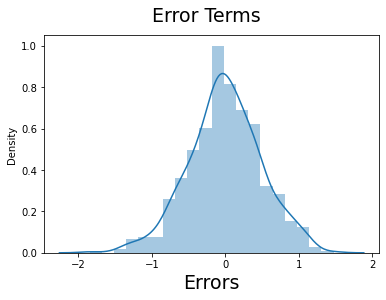

In [1246]:
##Taking the residuals and plotting the graph
res = y_train-y_train_cnt

# Plot the histogram with the  error values
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)                         # X-label

In [1247]:
#Selecting the variables that were part of final model.
col_1=X_train_rfeVal5.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1334 to 585
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              408 non-null    float64
 1   OverallQual        408 non-null    float64
 2   OverallCond        408 non-null    float64
 3   BsmtUnfSF          408 non-null    float64
 4   TotalBsmtSF        408 non-null    float64
 5   GrLivArea          408 non-null    float64
 6   GarageCars         408 non-null    float64
 7   BuiltOrRemodelAge  408 non-null    float64
 8   d_GarageFinish     408 non-null    float64
 9   MSZoning_RH        408 non-null    float64
 10  MSZoning_RM        408 non-null    float64
 11  Foundation_PConc   408 non-null    float64
dtypes: float64(12)
memory usage: 41.4 KB


In [1248]:
# Making predictions using the final model (lr9)

y_pred = lm5.predict(X_test_lm5)

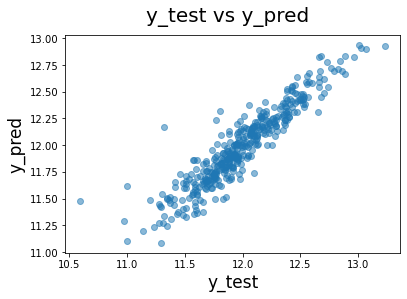

In [1249]:
##plotting the graph between y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()


In [1250]:
## Taking r2 score between y_test and y_pred
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8651961232857951

In [1251]:
#Taking Adjusted R2 score
# n is number of rows in X

n = X_test.shape[0]


# Number of features i.e predictors and  p 
p = X_test.shape[1]

# We  will now find the Adjusted R-squared using the below formula

adjustedr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjustedr2

0.8614515711548449

In [1252]:
# Printing the coefficients and intercept
y_pred_train = lm5.predict(X_train_cv5)
y_pred_test = lm5.predict(X_test_lm5)


lm11Coef=lm.coef_
print(lm11Coef)
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

[-4.72262569e-03  8.07092815e-03  2.19310957e-02  6.82768653e-02
  3.70814536e-02  1.30799527e-03  1.07419692e-02 -1.24992001e-02
  5.70022023e-02 -1.33626323e-02 -1.65301092e-02  1.16614847e-01
  1.17130664e-02  4.99411857e-03  1.03553546e-02  1.06429643e-03
  7.71669183e-03  3.31508087e-02  9.86177385e-03  9.27333480e-03
 -1.72207923e-02 -2.70624115e-02  1.47207029e-02  1.50570743e-03
 -3.90860146e-03  9.06168193e-03  1.02548114e-02  9.29298892e-03
  1.56409570e-02  1.59450482e-02  5.24223510e-03  1.15951451e-02
 -1.82110801e-02  9.24376905e-03 -4.02496131e-03 -5.07200727e-03
  2.61090185e-03  1.45257817e-02  7.53122994e-02  3.23078043e-02
  1.35848416e-01  1.11414601e-01 -1.56576478e-03 -9.78410449e-03
 -4.86808437e-03 -5.73040977e-03 -1.05631299e-02  1.15834742e-02
 -2.55765504e-02 -1.36084353e-02 -1.45650019e-02 -2.18528077e-02
 -1.57605493e-02 -2.32815280e-02 -9.37462757e-04 -1.27011907e-02
  2.74541241e-03  1.84124230e-02 -3.67229437e-02 -4.02438391e-03
 -1.82177358e-02 -9.82945

In [1253]:
# Creating a table which contain all the metrics including LASSO and RIDGE

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.888092,0.925153,0.927626
1,R2 Score (Test),0.865196,0.886210,0.889937
2,RSS (Train),152.669579,9.746973,9.424960
3,RSS (Test),27.211866,6.848803,6.624481
4,MSE (Train),0.123856,0.101292,0.099604
5,MSE (Test),0.141019,0.129562,0.127422


In [1254]:
#creating a dataframe for Storing Coefficients
Coeffs = pd.DataFrame()

In [1255]:
#Assigning values in dataframe
Coeffs['Linear'] = lm.coef_
Coeffs ['Ridge'] = ridge1
Coeffs ['Lasso'] = lasso_df['Coefficient']

In [1256]:
pd.set_option('display.max_rows', None)
Coeffs.head(90)


,Linear,Ridge,Lasso
0,-4.722626e-03,-0.0057,-0.0027
1,8.070928e-03,0.0092,0.0087
2,2.193110e-02,0.0177,0.0181
3,6.827687e-02,0.0642,0.0699
4,3.708145e-02,0.0356,0.0373
5,1.307995e-03,0.0022,0.0006
6,1.074197e-02,0.0199,0.0140
7,-1.249920e-02,-0.0026,-0.0096
8,5.700220e-02,0.0420,0.0544
9,-1.336263e-02,0.0315,0.0011


Observation:
    It is observered that Lasso model perfomance is slightly better than the Ridge Model Performance


In [1257]:
finalSelectionFromLasso=temp2_dfs[['Features','Coefficient']]
finalSelectionFromLasso

,Features,Coefficient
5,GrLivArea,0.099246
13,MSZoning_RL,0.096020
14,MSZoning_RM,0.075799
1,OverallQual,0.069883
11,MSZoning_FV,0.055320
4,TotalBsmtSF,0.054420
19,Foundation_PConc,0.038136
2,OverallCond,0.037264
6,GarageCars,0.032013
16,Neighborhood_NridgHt,0.023498


In [1258]:

res=finalSelectionFromRidge.sort_values(by=['Coefficient'], ascending = False)
print(res.head(20))


                Features  Coefficient
5              GrLivArea     0.099246
13           MSZoning_RL     0.096020
14           MSZoning_RM     0.075799
1            OverallQual     0.069883
11           MSZoning_FV     0.055320
4            TotalBsmtSF     0.054420
19      Foundation_PConc     0.038136
2            OverallCond     0.037264
6             GarageCars     0.032013
16  Neighborhood_NridgHt     0.023498
12           MSZoning_RH     0.021377
0                LotArea     0.018099
15  Neighborhood_Crawfor     0.017390
9          d_KitchenQual     0.015117
10        d_GarageFinish     0.012584
18   Exterior2nd_VinylSd     0.010031
3              BsmtUnfSF    -0.009576
7           IsRemodelled    -0.016736
17   Exterior1st_VinylSd    -0.022182
8      BuiltOrRemodelAge    -0.027013


In [1259]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(res[(res['Coefficient'] != 0)])
predRFE

,Features,Coefficient
5,GrLivArea,0.099246
13,MSZoning_RL,0.096020
14,MSZoning_RM,0.075799
1,OverallQual,0.069883
11,MSZoning_FV,0.055320
4,TotalBsmtSF,0.054420
19,Foundation_PConc,0.038136
2,OverallCond,0.037264
6,GarageCars,0.032013
16,Neighborhood_NridgHt,0.023498


In [1260]:
## Assign the Features as x1, x2.....

predRFE.set_index(pd.Index(['x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15','x16','x17','x18','x19','x20']), inplace = True) 
predRFE 

,Features,Coefficient
x1,GrLivArea,0.099246
x2,MSZoning_RL,0.096020
x3,MSZoning_RM,0.075799
x4,OverallQual,0.069883
x5,MSZoning_FV,0.055320
x6,TotalBsmtSF,0.054420
x7,Foundation_PConc,0.038136
x8,OverallCond,0.037264
x9,GarageCars,0.032013
x10,Neighborhood_NridgHt,0.023498


In [1261]:
c=lasso.intercept_
print(c)

11.991947591750217


# Hence the equation According Lasso:
Log(Y) = c +0.099246(x1) +0.096020(x2) +0.07579(x3) + 0.0698839(x4) + 0.055320(x5) +0.054420(x6) + 0.038136(x7) + 0.037264(x8) +0.032013(x9) +0.023498(x10)+ 0.0213778(x11) + 0.018099(x12) +0.017390(x13) +0.015117(x14) +0.012584(x15) + Error term(RSS + alpha * (sum of absolute value of coefficients)

# Final Inference
From The above ridge,lasso , normal linear reggression the nonlinearity obtained from manual removal oF each variable one after the other and the issue of overfitting because nonlinearity in variables is handled by lasso and ridge regression.But From above Lasso and Ridge regression Lasso gave slightly better  performance .So,considering Lasso Regression For Final Equation.
Suggestions for Surprise Housing is :
	

# TOP 7 POSITIVE PREDICTORS:

1.GrLivArea->Above grade (ground) living area square feet
2.MSZoning_RL->	Residential Low Density
3.MSZoning_RM->Residential Medium Density
4.OverallQual->Rates the overall material and finish of the house
5.MSZoning_FV->Floating Village Residential	
6.TotalBsmtSF->Total square feet of basement area	
7.Foundation_PConc->Type of foundation->Poured Contrete	


# TOP 3 NEGATIVE PREDICTORS ARE:

1.BsmtUnfSF	->Unfinished square feet of basement area.
2.IsRemodelled-> variable obtained from comparison between 'YearBuilt' and 'YearRemodAdd'.
3.Exterior1st_VinylSd.	
4.BuiltOrRemodelAge->variable obtained from compaarison between (yrsold and yearbuilt) or( yrsold and yearRemodAdd)	.

3rd question code in  Question and Answers code

In [1262]:
print(X_train.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)


In [1263]:
print(X_testL.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)


In [1264]:


#The Top 5 variables for dropping
dropvariables=['GrLivArea','MSZoning_RL','MSZoning_RM','OverallQual','MSZoning_FV']
X_train_dropped=X_train.drop(dropvariables,axis=1)
X_test_dropped=X_testL.drop(dropvariables,axis=1)

In [1265]:
#Performing Lasso Operation After removing Top 5 variables
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# Performing the cross Validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1266]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [1267]:
# Fitting the model on training data

lasso=Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [1268]:
## Make predictions
y_train_pred1 = lasso.predict(X_train_dropped)
y_pred1 = lasso.predict(X_test_dropped)

In [1269]:
##  checking metrics 
def show_metricss(y_train1, y_train_pred1, y_test1, y_pred1):
    metric1 = []
    print("R-Squared Train =", r2_score(y_train1, y_train_pred1))
    metric1.append(r2_score(y_train, y_train_pred))
    print("R-Squared Test",  r2_score(y_test1, y_pred1))
    metric1.append(r2_score(y_test, y_pred))
    rss_trains = np.sum(np.square(y_train1 - y_train_pred1))
    metric1.append(rss_trains)
    rss_tests = np.sum(np.square(y_test1 - y_pred1))
    metric1.append(rss_tests)
    print("RSS Train =", rss_trains)
    print("RSS Test) =",  rss_tests)
    mse_trains = mean_squared_error(y_train1, y_train_pred1)
    metric1.append(mse_trains)
    mse_tests = mean_squared_error(y_test1, y_pred1)
    metric1.append(mse_tests)
    print("MSE Train =",  mse_trains)
    print("MSE Test =", mse_tests)
    rmse_trains = mse_trains**0.5
    metric1.append(rmse_trains)
    rmse_tests = mse_tests**0.5
    metric1.append(rmse_tests)
    print("RMSE Train =", rmse_trains) 
    print("RMSE Test =",rmse_tests) 
    

    return metric1

In [1270]:
#Printing Final Metrics
lasso_metrics = show_metricss(y_train, y_train_pred, y_test, y_pred)

R-Squared Train = 0.915079292056876
R-Squared Test 0.8651961232857951
RSS Train = 11.05885110270816
RSS Test) = 27.211866474786625
MSE Train = 0.011640895897587537
MSE Test = 0.01988628770114674
RMSE Train = 0.10789298354196875
RMSE Test = 0.1410187494666817


In [1271]:
# Creating a table that will contain all the metrics

lr_table = {'Metrics': ['R2 Score Train','R2 Score Test','RSS Train','RSS Test',
                       'MSE Train','MSE Test', 'RMSE Train', 'RMSE Test'],
            'Final Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metrics', 'Final Lasso Regression'] )
final_metric.set_index('Metrics')

,Final Lasso Regression
Metrics,
R2 Score Train,0.915079
R2 Score Test,0.865196
RSS Train,11.058851
RSS Test,27.211866
MSE Train,0.011641
MSE Test,0.019886
RMSE Train,0.107893
RMSE Test,0.141019


In [1272]:
#Just created an empty DataFrame  for adding columns 
finalcol = pd.DataFrame(index=X_train_dropped.columns)
finalcol.rows = X_train_dropped.columns
finalcol

""
MSSubClass
LotFrontage
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [1273]:
##viewing the top 5 variables from the dataframe created above 
finalcol['Lasso'] = lasso.coef_

finalcol['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF       0.098722
1stFlrSF       0.078956
TotalBsmtSF    0.060651
OverallCond    0.043321
GarageCars     0.033100
Name: Lasso, dtype: float64